# Name : Raktima Dey

## The Sparks Foundation : Graduation Rotational Internship Program

## Data Science and Business Analytics Intern

## Task 1 : Prediction using Supervised ML

### Problem : Predict the score of a student based on the number of study hours.

### Importing required libraries

In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Importing the dataset

In [13]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10) #Displaying a sample of the data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
data.shape

(25, 2)

## Determining the correlation coefficient between the variables

In [16]:
correlation=data.corr(method='pearson')
print(correlation)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


## Plotting the data points to identify the relationship between the variables

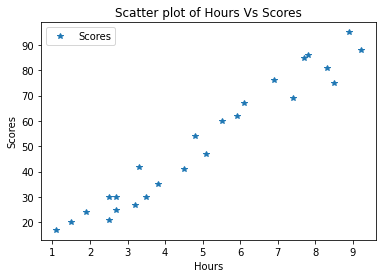

In [15]:
data.plot(x='Hours',y='Scores',style='*')
plt.title('Scatter plot of Hours Vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### From the scatterplot it can be observed that there is a positive linear relationship between Hours and Scores.

# Creating the prediction model :
- We divide the dataset into attributes and labels denoted by x and y respectively.
- Then split the dataset: 80% for training and 20% for testing.  We'll do this by using Scikit-Learn's built-in train_test_split() method:
- Then the dataset is trained using LinearRegression().
- Next the regression line is plotted.

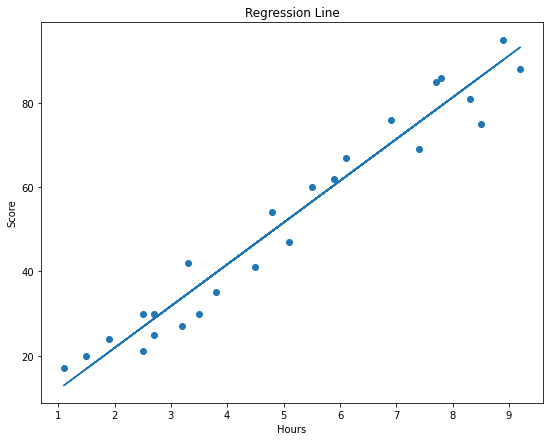

In [18]:
#Assigning the attributes to x and labels to y
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

#Splitting the dataset for training and testing of model
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

#Training the algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

#Plotting the regression line
reg=regressor.coef_*X+regressor.intercept_

#Plotting for the test data
plt.figure(figsize=(9,7))
plt.scatter(X,y)
plt.plot(X,reg);
plt.title("Regression Line")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

## Predicting the values and then comparing them

### Predicting the values in testing dataset

In [19]:
#Using model to make predictions
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})  
df 

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Testing the model

### Testing the model with the value provided in the problem

In [20]:
hour=9.25 #Provided Value
h=np.array(hour) #convert to a numpy array
h=h.reshape(1,1)
prediction=regressor.predict(h)
print("The number of hours studied is = {}".format(hour))
print("The predicted score is = {}".format(prediction[0]))

The number of hours studied is = 9.25
The predicted score is = 93.69173248737538


## Evaluating the model

 The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here we use the metrices - mean absolute error, root mean square error and R-square for evaluating the prediction model.

In [22]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse=(mean_absolute_error(y_test,y_pred))
print("The Mean Absolute Error is =",mse)
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
print("The Root Mean Square Error is =",rmse)

#To find coefficient of determination
r2=r2_score(y_test,y_pred)
print("The R-square is =",r2)

The Mean Absolute Error is = 4.183859899002975
The Root Mean Square Error is = 4.6474476121003665
The R-square is = 0.9454906892105356
